In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')
std_wines = pd.read_csv('../data/std_data.csv')
all_data = pd.concat([train,test])

Xtrain,Xtest,ytrain,ytest = train_test_split(all_data.drop('quality',axis=1),all_data.quality, stratify=all_data.quality)

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(Xtrain, ytrain)
Xtest, ytest = ros.fit_resample(Xtest,ytest)
from collections import Counter
print(sorted(Counter(y_resampled).items()))
print(sorted(Counter(ytrain).items()))

[(3, 2127), (4, 2127), (5, 2127), (6, 2127), (7, 2127), (8, 2127), (9, 2127)]
[(3, 22), (4, 162), (5, 1603), (6, 2127), (7, 809), (8, 145), (9, 4)]


In [3]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(X_resampled,y_resampled)

LinearRegression()

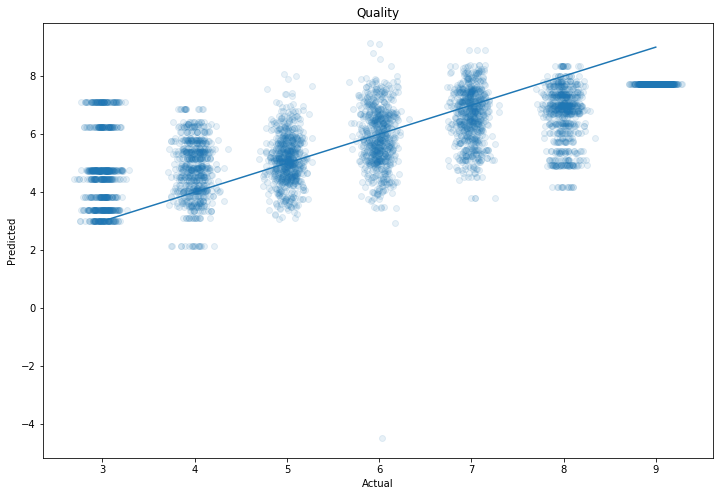

In [28]:
import numpy as np
import matplotlib.pyplot as plt

y_pred = model1.predict(Xtest)

def class_scatter(test,pred):
    plt.figure(figsize=(12,8))
    plt.scatter(test + np.random.normal(size=len(ytest))/10,pred,alpha = 0.1)
    plt.plot(range(3,10),range(3,10))
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Quality')
    plt.show()
    
class_scatter(ytest,y_pred)

[3 4 5 6 7 8 9]
21.472793208819052


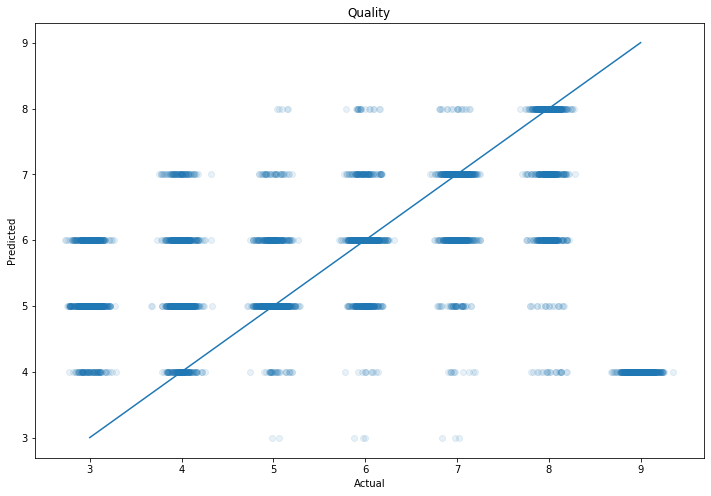

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import log_loss

tree = DecisionTreeClassifier(min_samples_split = 5)
tree.fit(X_resampled,y_resampled)
y_pred = tree.predict(Xtest)
print(tree.classes_)
print(log_loss(ytest,tree.predict_proba(Xtest)))
class_scatter(ytest,y_pred)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00       709
           4       0.42      0.24      0.31       709
           5       0.41      0.65      0.50       709
           6       0.19      0.61      0.29       709
           7       0.51      0.53      0.52       709
           8       0.81      0.35      0.49       709
           9       0.00      0.00      0.00       709

    accuracy                           0.34      4963
   macro avg       0.33      0.34      0.30      4963
weighted avg       0.33      0.34      0.30      4963



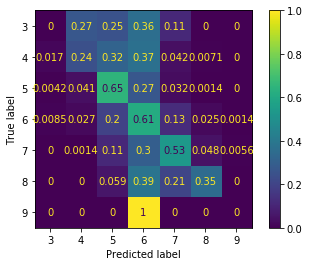

In [30]:
from sklearn.metrics import classification_report, plot_confusion_matrix
print(classification_report(ytest,y_pred))
plot_confusion_matrix(tree,Xtest,ytest,labels=[3,4,5,6,7,8,9],normalize='true')
plt.show()

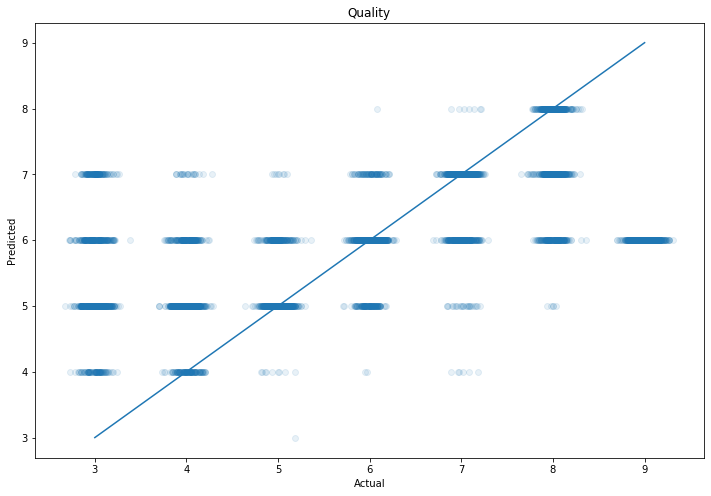

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00       709
           4       0.52      0.16      0.24       709
           5       0.37      0.74      0.49       709
           6       0.24      0.71      0.36       709
           7       0.48      0.63      0.55       709
           8       0.97      0.41      0.57       709
           9       0.00      0.00      0.00       709

    accuracy                           0.38      4963
   macro avg       0.37      0.38      0.32      4963
weighted avg       0.37      0.38      0.32      4963



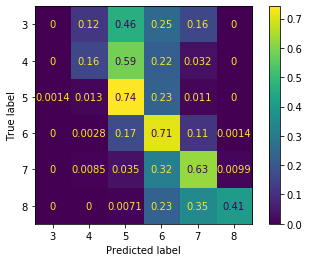

In [69]:
from sklearn.ensemble import RandomForestClassifier

randomForest = RandomForestClassifier()
randomForest.fit(X_resampled,y_resampled)
y_pred = randomForest.predict(Xtest)
log_loss(ytest,randomForest.predict_proba(Xtest))
class_scatter(ytest,y_pred)
print(classification_report(ytest,y_pred))
plot_confusion_matrix(randomForest,Xtest,ytest,labels=[3,4,5,6,7,8],normalize='true')
plt.show()

              precision    recall  f1-score   support

           3       0.29      0.47      0.36       709
           4       0.21      0.10      0.13       709
           5       0.19      0.23      0.21       709
           6       0.19      0.21      0.20       709
           7       0.18      0.19      0.18       709
           8       0.08      0.12      0.10       709
           9       0.00      0.00      0.00       709

    accuracy                           0.19      4963
   macro avg       0.16      0.19      0.17      4963
weighted avg       0.16      0.19      0.17      4963



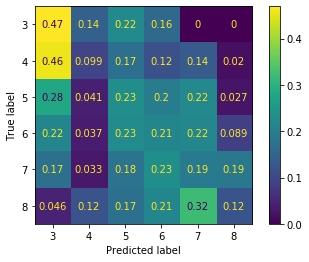

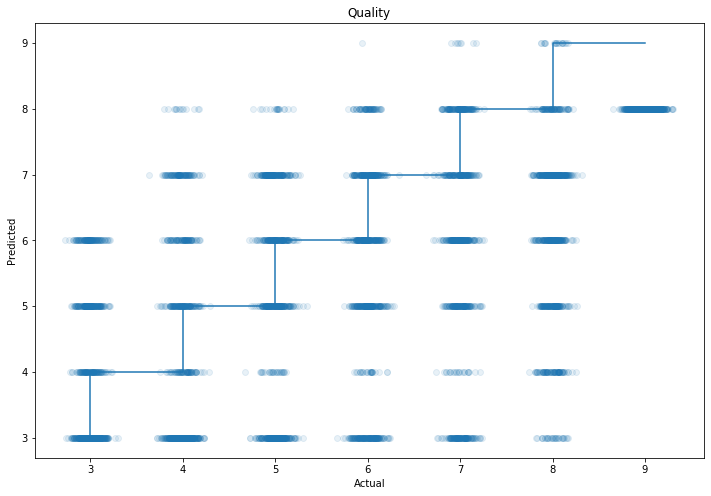

In [16]:
from sklearn.ensemble import AdaBoostClassifier

AdaModel = AdaBoostClassifier(learning_rate=1,n_estimators=100)

def check_out_model(model):
    model.fit(X_resampled,y_resampled)
    y_pred = model.predict(Xtest)
    print(classification_report(ytest,y_pred))
    plot_confusion_matrix(model,Xtest,ytest,labels=[3,4,5,6,7,8],normalize='true')
    plt.show()
    class_scatter(ytest,y_pred)
    
check_out_model(AdaModel)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00       709
           4       0.42      0.09      0.15       709
           5       0.25      0.73      0.37       709
           6       0.31      0.80      0.44       709
           7       0.65      0.53      0.58       709
           8       0.98      0.41      0.57       709
           9       0.00      0.00      0.00       709

    accuracy                           0.36      4963
   macro avg       0.37      0.36      0.30      4963
weighted avg       0.37      0.36      0.30      4963



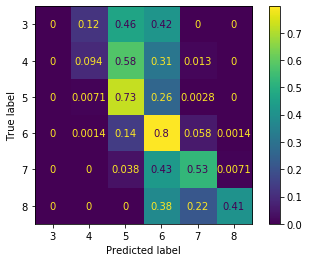

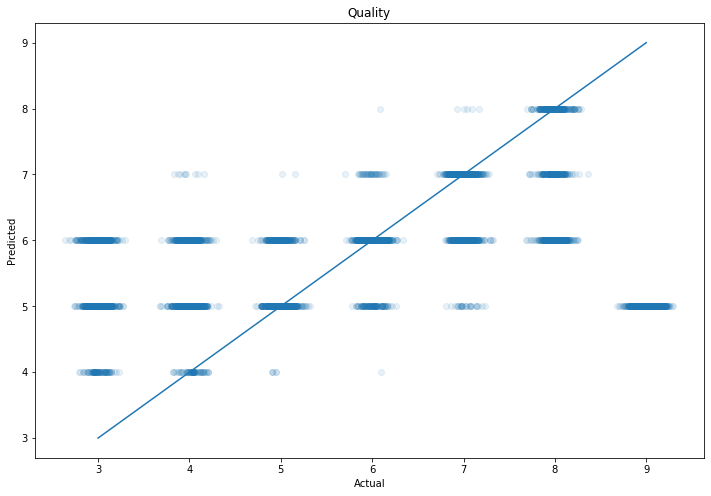

ExtraTreesClassifier()

In [54]:
from sklearn.ensemble import ExtraTreesClassifier
check_out_model(ExtraTreesClassifier())
extraTrees = ExtraTreesClassifier()
extraTrees.fit(Xtrain,ytrain)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


              precision    recall  f1-score   support

           3       0.35      0.39      0.37       709
           4       0.39      0.54      0.45       709
           5       0.40      0.44      0.42       709
           6       0.26      0.05      0.08       709
           7       0.16      0.30      0.21       709
           8       0.33      0.39      0.36       709
           9       0.00      0.00      0.00       709

    accuracy                           0.30      4963
   macro avg       0.27      0.30      0.27      4963
weighted avg       0.27      0.30      0.27      4963



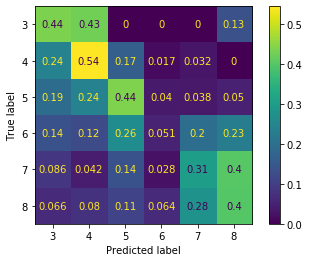

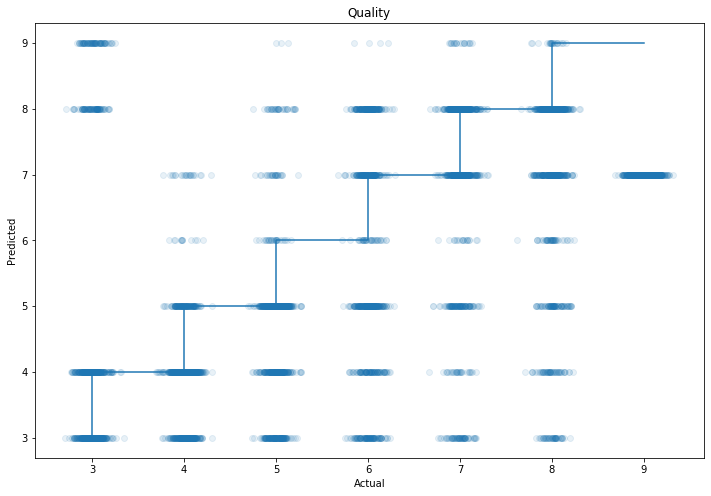

In [18]:
from sklearn.svm import LinearSVC

check_out_model(LinearSVC())

              precision    recall  f1-score   support

           3       0.83      0.11      0.19       709
           4       0.48      0.39      0.43       709
           5       0.25      0.62      0.35       709
           6       0.31      0.42      0.35       709
           7       0.41      0.60      0.49       709
           8       0.68      0.48      0.56       709
           9       0.00      0.00      0.00       709

    accuracy                           0.37      4963
   macro avg       0.42      0.37      0.34      4963
weighted avg       0.42      0.37      0.34      4963



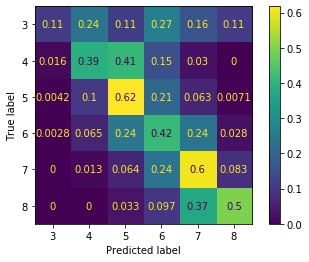

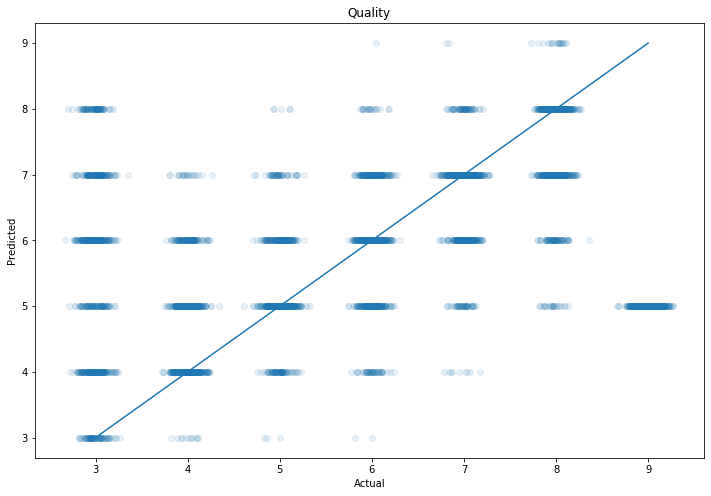

KNeighborsClassifier()

In [89]:
from sklearn.neighbors import KNeighborsClassifier

check_out_model(KNeighborsClassifier(n_neighbors=5))
kneighbors = KNeighborsClassifier(n_neighbors=5)
kneighbors.fit(Xtrain,ytrain)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00       709
           4       0.59      0.28      0.38       709
           5       0.36      0.69      0.48       709
           6       0.32      0.67      0.44       709
           7       0.29      0.63      0.40       709
           8       0.91      0.34      0.50       709
           9       0.00      0.00      0.00       709

    accuracy                           0.37      4963
   macro avg       0.36      0.37      0.31      4963
weighted avg       0.36      0.37      0.31      4963



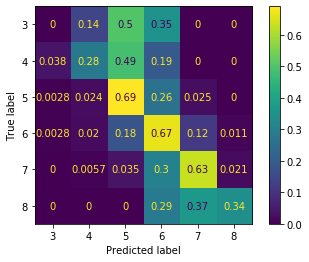

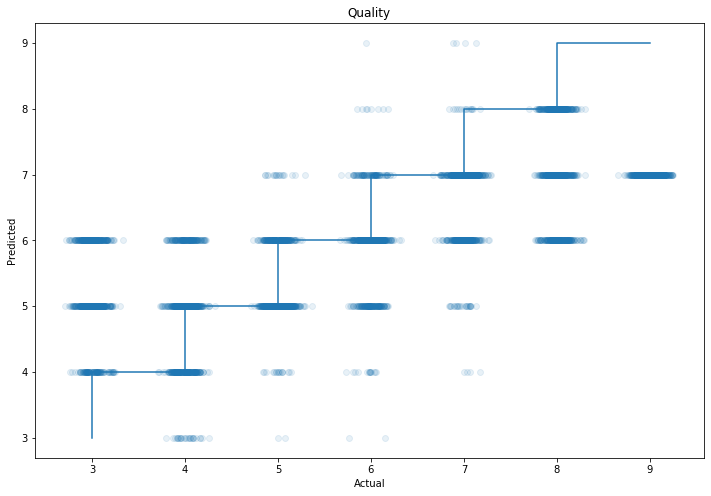

In [26]:
from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier(DecisionTreeClassifier(),n_estimators=40)
check_out_model(bag)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00       709
           4       0.43      0.36      0.39       709
           5       0.35      0.60      0.44       709
           6       0.17      0.38      0.23       709
           7       0.42      0.63      0.51       709
           8       0.74      0.51      0.61       709
           9       0.00      0.00      0.00       709

    accuracy                           0.35      4963
   macro avg       0.30      0.35      0.31      4963
weighted avg       0.30      0.35      0.31      4963



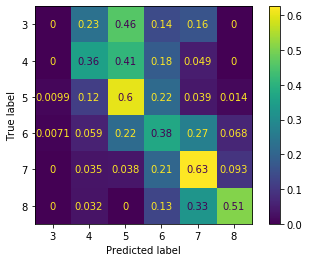

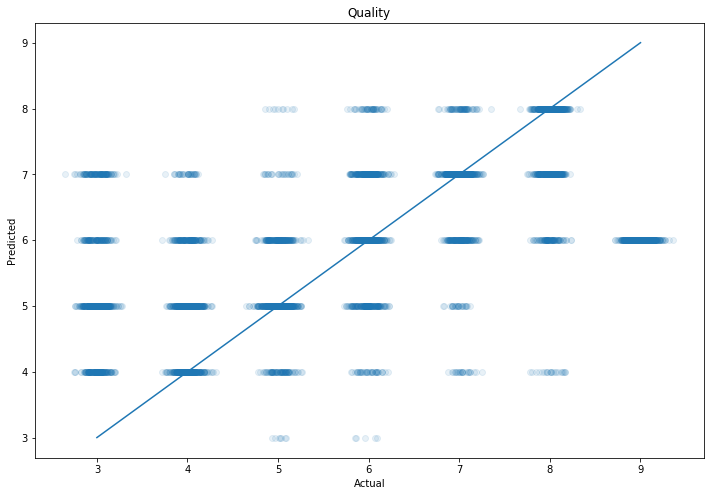

GradientBoostingClassifier()

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

check_out_model(GradientBoostingClassifier())
gradientBoost = GradientBoostingClassifier()
gradientBoost.fit(Xtrain,ytrain)

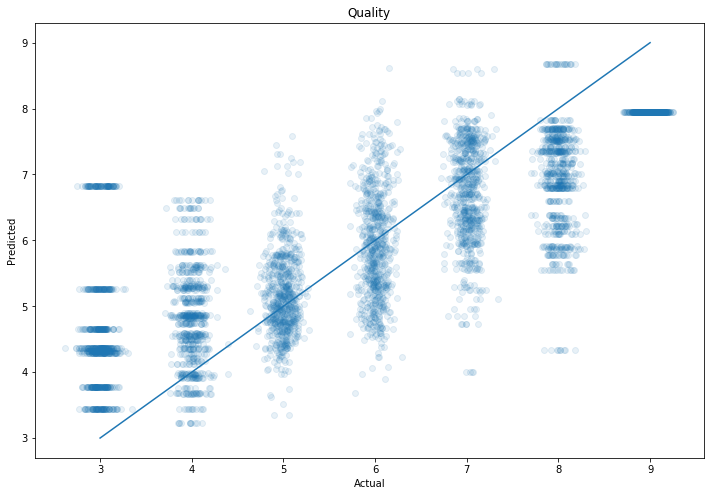

In [32]:
def check_out_regression(model):
    model.fit(X_resampled,y_resampled)
    y_pred = model.predict(Xtest)
    #print(classification_report(ytest,y_pred))
    #plot_confusion_matrix(model,Xtest,ytest,labels=[3,4,5,6,7,8],normalize='true')
    plt.show()
    class_scatter(ytest,y_pred)
    
from sklearn.ensemble import GradientBoostingRegressor

check_out_regression(GradientBoostingRegressor())

i =  3


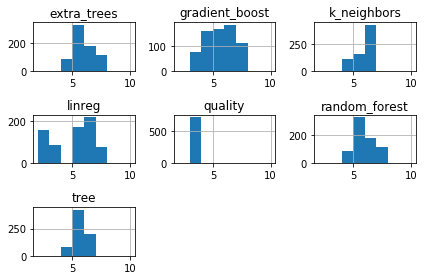

i =  4


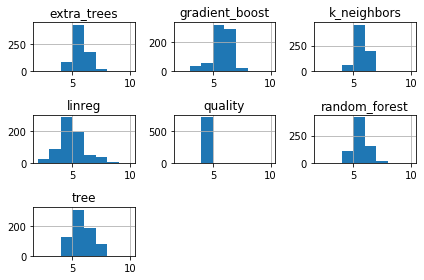

i =  5


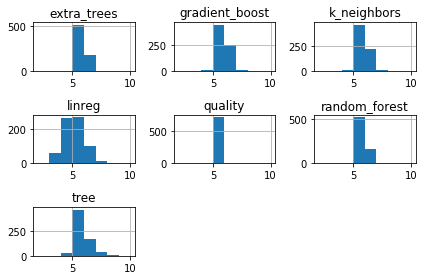

i =  6


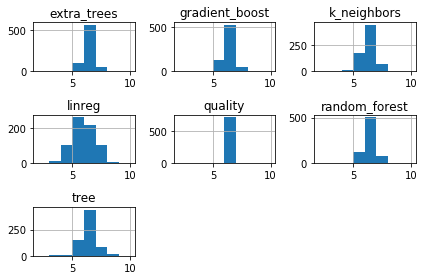

i =  7


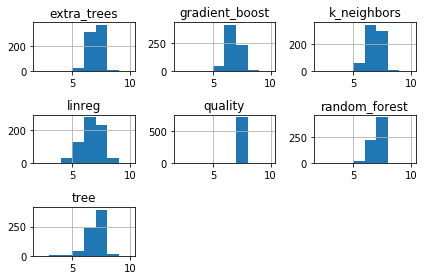

i =  8


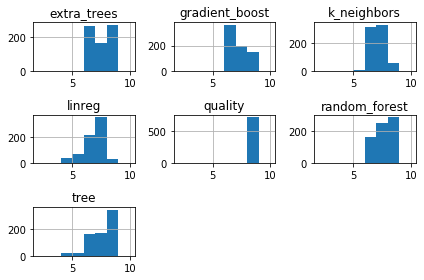

i =  9


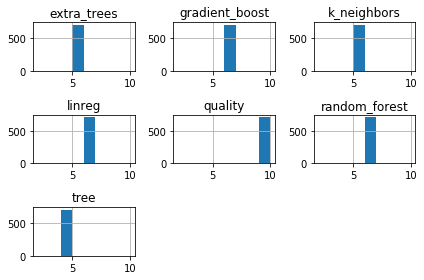

In [90]:
comparison = pd.DataFrame(ytest.transpose())
comparison['linreg'] = model1.predict(Xtest)
comparison['tree'] = tree.predict(Xtest)
comparison['random_forest'] = randomForest.predict(Xtest)
comparison['extra_trees'] = extraTrees.predict(Xtest)
comparison['gradient_boost'] = gradientBoost.predict(Xtest)
comparison['k_neighbors'] = kneighbors.predict(Xtest)

for i in range(3,10):
    print("i = ", i)
    comparison[comparison['quality'] == i].hist(bins=[2,3,4,5,6,7,8,9,10])
    plt.tight_layout()
    plt.show()

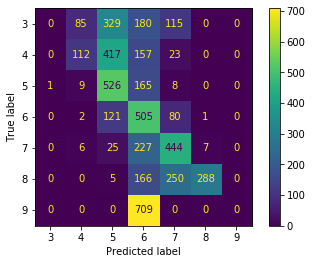

In [83]:
plot_confusion_matrix(randomForest,Xtest,ytest)

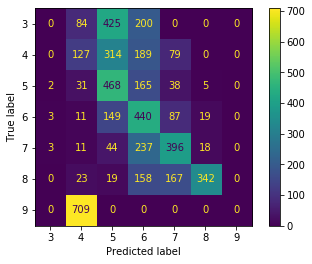

In [80]:
plot_confusion_matrix(tree,Xtest,ytest)

In [96]:
comparison[comparison['quality'] == 3].sample(20)

,quality,linreg,tree,random_forest,extra_trees,gradient_boost,k_neighbors
1916,3,6.666967,6,7,7,7,4
2076,3,2.995617,5,5,5,5,5
1883,3,6.630248,5,6,6,6,6
2038,3,7.527015,5,6,6,4,6
1936,3,2.633777,5,5,5,3,5
2152,3,2.995617,5,5,5,5,5
2256,3,5.053456,4,5,5,4,6
2275,3,5.086959,6,4,4,6,6
1834,3,6.630248,5,6,6,6,6
1903,3,6.666967,6,7,7,7,4


In [101]:
from sklearn.metrics import mean_squared_error

print('tree', mean_squared_error(ytest,tree.predict(Xtest)))
print('random_forest', mean_squared_error(ytest,randomForest.predict(Xtest)))
print('extra_trees',mean_squared_error(ytest,extraTrees.predict(Xtest)))
print('gradient_boost',mean_squared_error(ytest,gradientBoost.predict(Xtest)))
print('k_neighbors',mean_squared_error(ytest,kneighbors.predict(Xtest)))
print('linear_regression',mean_squared_error(ytest,model1.predict(Xtest)))

tree 5.196453757807777
random_forest 2.8740681039693734
extra_trees 3.9403586540398954
gradient_boost 3.0588353818255087
k_neighbors 4.05460407011888
linear_regression 3.286348263319027


In [102]:
from sklearn.ensemble import RandomForestRegressor

randomForestRegressor = RandomForestRegressor()
randomForestRegressor.fit(Xtrain,ytrain)
print('random_forest_regressor',mean_squared_error(ytest,randomForestRegressor.predict(Xtest)))

random_forest_regressor 3.264862079387467


In [105]:
from sklearn.metrics import explained_variance_score

print('tree',explained_variance_score(ytest,tree.predict(Xtest)))
print('random_forest', explained_variance_score(ytest,randomForest.predict(Xtest)))
print('extra_trees',explained_variance_score(ytest,extraTrees.predict(Xtest)))
print('gradient_boost',explained_variance_score(ytest,gradientBoost.predict(Xtest)))
print('k_neighbors',explained_variance_score(ytest,kneighbors.predict(Xtest)))
print('linear_regression',explained_variance_score(ytest,model1.predict(Xtest)))

tree -0.2624731698834928
random_forest 0.2826701187416746
extra_trees 0.02894707151681264
gradient_boost 0.24454789743923688
k_neighbors 0.011590464175986193
linear_regression 0.18573405251519803


In [107]:
from sklearn.metrics import mean_absolute_error

print('tree',mean_absolute_error(ytest,tree.predict(Xtest)))
print('random_forest', mean_absolute_error(ytest,randomForest.predict(Xtest)))
print('extra_trees', mean_absolute_error(ytest,extraTrees.predict(Xtest)))
print('gradient_boost',mean_absolute_error(ytest,gradientBoost.predict(Xtest)))
print('k_neighbors',mean_absolute_error(ytest,kneighbors.predict(Xtest)))
print('linear_regression',mean_absolute_error(ytest,model1.predict(Xtest)))

tree 1.536167640539996
random_forest 1.2024984888172476
extra_trees 1.378198670159178
gradient_boost 1.315937940761636
k_neighbors 1.4948619786419504
linear_regression 1.3910440370915653


In [117]:
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import BaggingClassifier

clf1 = BaggingClassifier(ExtraTreeClassifier())
clf1.fit(Xtrain,ytrain)
print('BaggingExtraTreeClassifier',mean_squared_error(ytest,clf1.predict(Xtest)))

BaggingExtraTreeClassifier 2.6770098730606486


In [112]:
clf1.get_params()

{'base_estimator__ccp_alpha': 0.0,
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': None,
 'base_estimator__max_features': 'auto',
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_impurity_split': None,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__random_state': None,
 'base_estimator__splitter': 'random',
 'base_estimator': ExtraTreeClassifier(),
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [123]:
comparison['bag_extra_trees'] = clf1.predict(Xtest)

In [124]:
comparison.sample(10)

,quality,linreg,tree,random_forest,extra_trees,gradient_boost,k_neighbors,bag_extra_trees
3958,8,7.233907,7,7,6,6,7,7
3242,7,7.033243,4,6,6,6,6,7
3702,8,6.748280,6,6,6,6,6,6
38,5,5.121171,5,5,5,5,6,5
297,5,5.175591,5,5,5,5,6,5
4616,9,6.060651,4,6,5,6,5,6
2494,4,4.699492,5,5,5,5,5,6
851,5,5.051904,6,6,6,6,6,6
4715,9,6.060651,4,6,5,6,5,6
1577,6,5.247946,6,6,6,6,6,6


In [125]:
comparison[comparison['quality'] != comparison['bag_extra_trees']].sample(10)

,quality,linreg,tree,random_forest,extra_trees,gradient_boost,k_neighbors,bag_extra_trees
4182,8,7.798426,7,7,6,7,7,7
4818,9,6.060651,4,6,5,6,5,6
1695,3,5.086959,6,4,4,6,6,4
2061,3,6.666967,6,7,7,7,4,6
2572,4,4.249589,4,4,4,6,4,6
4824,9,6.060651,4,6,5,6,5,6
4536,9,6.060651,4,6,5,6,5,6
4629,9,6.060651,4,6,5,6,5,6
3938,8,6.493100,6,7,7,7,7,7
2292,3,6.666967,6,7,7,7,4,6


In [122]:
clf2 = BaggingClassifier(ExtraTreeClassifier(),n_estimators=100)
clf2.fit(Xtrain,ytrain)
print('BaggingExtraTreeClassifier',mean_squared_error(ytest,clf2.predict(Xtest)))

BaggingExtraTreeClassifier 3.8537175095708243
